# FINAL PROJECT

# Assignment-I :- Breast Cancer Detection

# Name :- Sameer Sunil Thite

# Program :- Deep Learning Using Computer Vision Internship Program

# Batch :- December 2021

# certificate Id :- TCRIK01R20 

In [148]:
# Importing packages
import numpy as np 
import pandas as pd
import os 
import cv2 as cv2
from matplotlib import pyplot as plt 
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, GlobalAveragePooling2D, Dropout, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.optimizers import Adam

In [149]:
# IDC Dataset
dataset = r"/content/drive/MyDrive/BCD"
Yes_path = r"/content/drive/MyDrive/BCD/1" # IDC
No_path = r"/content/drive/MyDrive/BCD/0" # No IDC

(50, 50, 3)


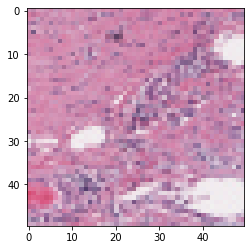

In [150]:
import pandas as pd
import cv2 as cv2
img = cv2.imread('/content/drive/MyDrive/BCD/1/9023_idx5_x1301_y1351_class1.png')
print(img.shape)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# Checking the size of the image


(50, 50, 3)


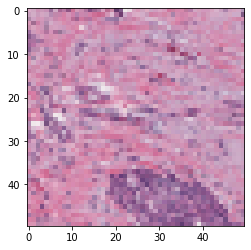

In [151]:
img = cv2.imread('/content/drive/MyDrive/BCD/1/9023_idx5_x1301_y1551_class1.png')
print(img.shape)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# Checking the size of the image

In [152]:
vals1 = [Yes_path, No_path]
print(os.listdir(vals1[0]).__len__()) # No. of images in 'yes' folder
print(os.listdir(vals1[1]).__len__()) # No. of images in 'no' folder

288
583


In [153]:
# Here we are providing each of the images in folders 'yes' and 'no' with labels 'yes' and 'no'
pathdir = [Yes_path, No_path]
classes = ['Yes', 'No']
filepaths = [] 
labels = [] 
for i, j in zip(pathdir, classes): 
    filelist = os.listdir(i)
    print(filelist)
    for vals in filelist:
        x = os.path.join(i, vals)
        filepaths.append(x)
        labels.append(j)
print(filepaths.__len__(), labels.__len__())

['9023_idx5_x1501_y1301_class1.png', '9023_idx5_x1701_y2051_class1.png', '9023_idx5_x1401_y2001_class1.png', '9023_idx5_x1451_y1851_class1.png', '9023_idx5_x1801_y1651_class1.png', '9023_idx5_x1751_y1251_class1.png', '9023_idx5_x1401_y1451_class1.png', '9023_idx5_x1751_y1551_class1.png', '9023_idx5_x1601_y1401_class1.png', '9023_idx5_x1951_y1851_class1.png', '9023_idx5_x2051_y1501_class1.png', '9023_idx5_x1801_y1551_class1.png', '9023_idx5_x1451_y1301_class1.png', '9023_idx5_x2151_y1751_class1.png', '9023_idx5_x1501_y1601_class1.png', '9023_idx5_x1751_y1301_class1.png', '9023_idx5_x1451_y1251_class1.png', '9023_idx5_x1551_y1551_class1.png', '9023_idx5_x1951_y2001_class1.png', '9023_idx5_x1801_y2101_class1.png', '9023_idx5_x1851_y1401_class1.png', '9023_idx5_x1701_y1601_class1.png', '9023_idx5_x1901_y1701_class1.png', '9023_idx5_x2101_y2001_class1.png', '9023_idx5_x1851_y1901_class1.png', '9023_idx5_x1901_y1601_class1.png', '9023_idx5_x1951_y1801_class1.png', '9023_idx5_x1601_y1601_clas

In [154]:
# By converting into data frame merging filepaths and labels
datazipping = list(zip(filepaths, labels))
pathframe = pd.DataFrame(datazipping, columns=['filepaths', 'labels'])

In [155]:
pathframe.head()

,filepaths,labels
0,/content/drive/MyDrive/BCD/1/9023_idx5_x1501_y...,Yes
1,/content/drive/MyDrive/BCD/1/9023_idx5_x1701_y...,Yes
2,/content/drive/MyDrive/BCD/1/9023_idx5_x1401_y...,Yes
3,/content/drive/MyDrive/BCD/1/9023_idx5_x1451_y...,Yes
4,/content/drive/MyDrive/BCD/1/9023_idx5_x1801_y...,Yes


In [156]:
pathframe.tail()

,filepaths,labels
866,/content/drive/MyDrive/BCD/0/9023_idx5_x751_y1...,No
867,/content/drive/MyDrive/BCD/0/9023_idx5_x1301_y...,No
868,/content/drive/MyDrive/BCD/0/9023_idx5_x551_y6...,No
869,/content/drive/MyDrive/BCD/0/9023_idx5_x2001_y...,No
870,/content/drive/MyDrive/BCD/0/9023_idx5_x1901_y...,No


In [157]:
pathframe.__len__()

871

In [158]:
# Giving us a count of the no. of 'yes' labels and the no. of 'no' labels in the dataset
print(pathframe['labels'].value_counts())

No     583
Yes    288
Name: labels, dtype: int64


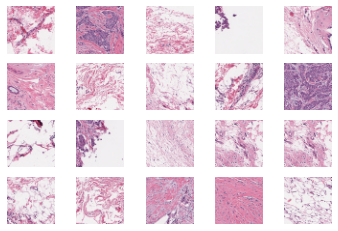

In [159]:
# Here we are calling the filepaths from the dataframe and then we are doing subplotting
for i in range(0, 20):
    vals = np.random.randint(1, len(pathframe))
    plt.subplot(4,5, i+1)
    plt.imshow(cv2.cvtColor(cv2.imread(pathframe.filepaths[vals]), cv2.COLOR_BGR2RGB))
    plt.axis('off')
plt.show()

In [160]:
# Splitting the dataset into train and test images
Train, Test = train_test_split(pathframe, train_size=0.90, random_state=42)
# Splitting the data into train and test
Train_new, valid = train_test_split(Train, train_size = 0.90, random_state=42)
# Splitting the training data again into training data and validation data
print(Train.shape, Test.shape, Train_new.shape, valid.shape)

(783, 2) (88, 2) (704, 2) (79, 2)


In [161]:
train_datagen = ImageDataGenerator(rescale=1.0/255, rotation_range= 40 , width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, zoom_range=0.1, horizontal_flip = True, vertical_flip= True)
test_datagen = ImageDataGenerator(rescale=1.0/255)

In [162]:
train_gen = train_datagen.flow_from_dataframe(dataframe = Train_new, x_col = 'filepaths', y_col='labels', batch_size=16, target_size=(200,200), class_mode = 'binary', shuffle=True)
test_gen = train_datagen.flow_from_dataframe(dataframe = Test, x_col = 'filepaths', y_col='labels', batch_size=16, target_size=(200,200), class_mode = 'binary', shuffle=False)
valid_gen = train_datagen.flow_from_dataframe(dataframe = valid, x_col = 'filepaths', y_col='labels', batch_size=16, target_size=(200,200), class_mode = 'binary', shuffle=True)

Found 704 validated image filenames belonging to 2 classes.
Found 88 validated image filenames belonging to 2 classes.
Found 79 validated image filenames belonging to 2 classes.


In [163]:
print(train_gen.class_indices)

{'No': 0, 'Yes': 1}


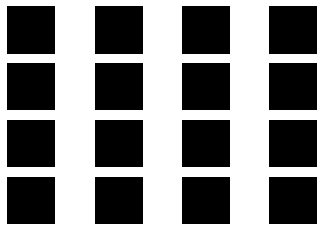

In [164]:
# Plotting the distorted images after adding noise
for i in range(0, 16):
    val = train_gen[0][0][0]
    vals = val.astype('uint8')
    plt.subplot(4, 4, i+1)
    plt.imshow(vals)
    plt.axis('off')
plt.show()

In [165]:
base_model = tf.keras.applications.InceptionResNetV2(weights='imagenet', input_shape= (150,150,3), include_top=False)
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

In [166]:
callbacks = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience = 2, min_delta= 0.01)

In [167]:
model.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])
history= model.fit(train_gen, validation_data= valid_gen, epochs=10, verbose=1)

Epoch 1/10
 1/44 [..............................] - ETA: 24:11 - loss: 0.8750 - accuracy: 0.5625

KeyboardInterrupt: ignored

In [100]:
model.evaluate(test_gen)

6/6 [==============================] - 16s 3s/step - loss: 0.7460 - accuracy: 0.8977


[0.7460222840309143, 0.8977272510528564]

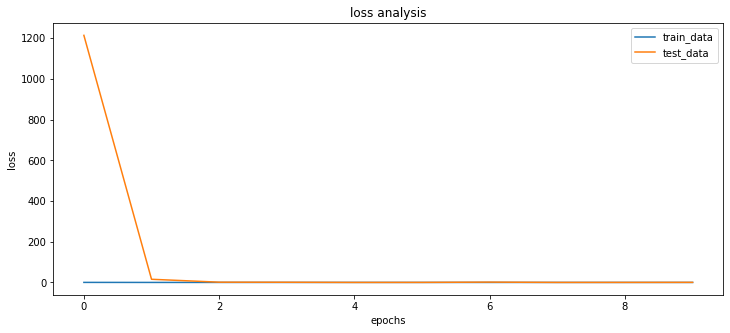

In [101]:
# Plotting loss analysis graph
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train_data','test_data'])
plt.title('loss analysis')
plt.show()

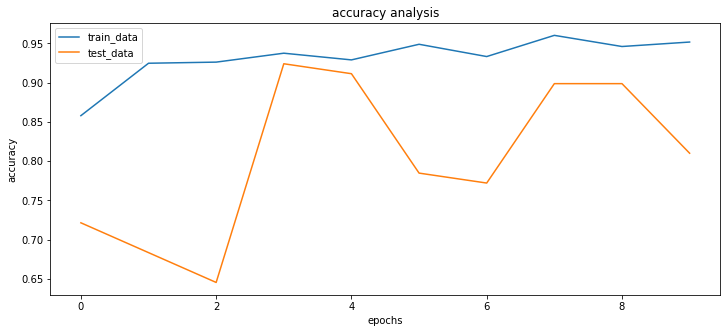

In [102]:
# Plotting accuracy analysis graph
plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train_data','test_data'])
plt.title('accuracy analysis')
plt.show()